In [1]:
# %matplotlib qt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

import time
import copy
import numpy as np
from skimage.filters import gaussian_filter
import cv2

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl

from tifffile import imread, imsave
import cPickle as pickle

%reload_ext autoreload
%autoreload 2

from netsurface2d import NetSurf2d
from netsurface2dt import NetSurf2dt
from data3d import Data3d

Populating the interactive namespace from numpy and matplotlib


# Load time-lapse data...

In [2]:
folder = '/Users/jug/Repositories/GIT/BobSeg/AmyMaddox/'
#folder = '/Users/maddox/Jug/Data/'

filename = folder + 'Reslice_of_298_crop.tif'
#filename = folder + 'Reslice_of_nd324_crop_16b.tif'

stack = imread(filename)
stack = stack / np.max(stack.astype(float))
print 'Stack shape:',stack.shape

sigma = [0.,3.,3.]
stack_smooth = gaussian_filter(stack,sigma)

sigma_bg_level = [0.,50.,50.]
stack_bg_level = gaussian_filter(stack,sigma_bg_level)

Stack shape: (76, 395, 490)


/usr/local/lib/python2.7/site-packages/skimage/filters/_gaussian.py:22: skimage_deprecation: Function ``gaussian_filter`` is deprecated. Use ``skimage.filters.gaussian`` instead.
  multichannel=None, preserve_range=False, truncate=4.0):
/usr/local/lib/python2.7/site-packages/skimage/filters/_gaussian.py:22: skimage_deprecation: Function ``gaussian_filter`` is deprecated. Use ``skimage.filters.gaussian`` instead.
  multichannel=None, preserve_range=False, truncate=4.0):


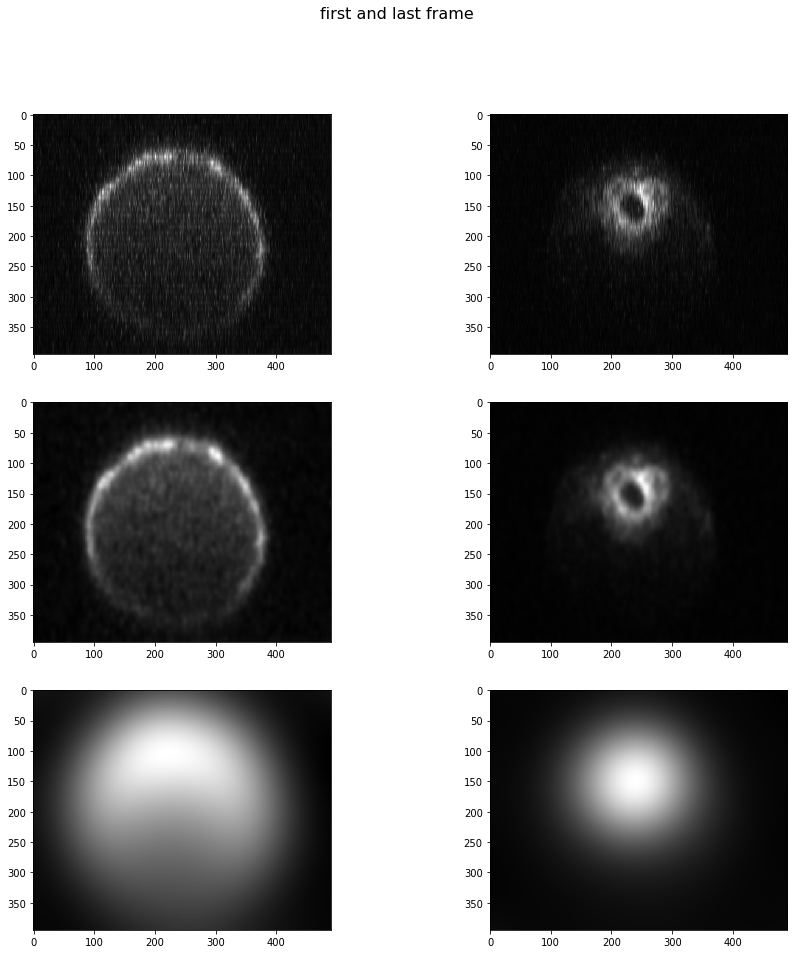

In [3]:
pylab.rcParams['figure.figsize'] = (15, 15)

fig = plt.figure()
fig.suptitle('first and last frame', fontsize=16)
ax = fig.add_subplot(321)
ax.imshow(stack[0], plt.get_cmap('gray'))
ax = fig.add_subplot(322)
ax.imshow(stack[-1], plt.get_cmap('gray'))
ax = fig.add_subplot(323)
ax.imshow(stack_smooth[0], plt.get_cmap('gray'))
ax = fig.add_subplot(324)
ax.imshow(stack_smooth[-1], plt.get_cmap('gray'))
ax = fig.add_subplot(325)
ax.imshow(stack_bg_level[0], plt.get_cmap('gray'))
ax = fig.add_subplot(326)
ax.imshow(stack_bg_level[-1], plt.get_cmap('gray'))

In [4]:
max_rs = (stack[0].shape[1] / 2.5,
          stack[0].shape[1] / 2.5)

min_rs = (5,5)
print min_rs, max_rs

(5, 5) (196.0, 196.0)


# Adding ring

In [5]:
data = Data3d( stack_smooth, pixelsize=(1.,1.), silent=False )
data.set_seg_params(num_columns=72,K=200,max_delta_k=1)
objects = []

In [6]:
ring = data.init_object("ring")
objects.append(ring)

In [7]:
cx = stack.shape[2] / 2
cy = stack.shape[1] / 2
data.add_object_at( ring, min_rs, max_rs, frame=0, seed=(cx,cy), segment_it=True )
data.track(ring, seed_frame=0, target_frames=range(0,len(data.images)), recenter_iterations=2)

Added appearance for "ring" in frame 0 with seed coordinates [ 245.  197.]
      Optimum energy:  5.09139082509
      Nodes in/out:  10008 4392
      Area:  58185.5
Added appearance for "ring" in frame 0 with seed coordinates [ 245.  197.]
      Optimum energy:  5.09139082509
      Nodes in/out:  10008 4392
      Area:  58185.5
    Updated center to [238 200]
    Updated center to [238 200]
Added appearance for "ring" in frame 1 with seed coordinates [ 238.  200.]
      Optimum energy:  4.50566609471
      Nodes in/out:  10240 4160
      Area:  60838.0
    Updated center to [234 204]
    Updated center to [234 204]
Added appearance for "ring" in frame 2 with seed coordinates [ 234.  204.]
      Optimum energy:  4.000889611
      Nodes in/out:  10340 4060
      Area:  61851.0
    Updated center to [233 208]
    Updated center to [233 208]
Added appearance for "ring" in frame 3 with seed coordinates [ 233.  208.]
      Optimum energy:  3.651702731
      Nodes in/out:  10403 3997
      Ar

Added appearance for "ring" in frame 35 with seed coordinates [ 253.  205.]
      Optimum energy:  2.84858477357
      Nodes in/out:  8251 6149
      Area:  39774.5
    Updated center to [253 203]
    Updated center to [253 203]
Added appearance for "ring" in frame 36 with seed coordinates [ 253.  203.]
      Optimum energy:  2.87510810067
      Nodes in/out:  8121 6279
      Area:  38610.5
    Updated center to [252 199]
    Updated center to [252 199]
Added appearance for "ring" in frame 37 with seed coordinates [ 252.  199.]
      Optimum energy:  2.7326012959
      Nodes in/out:  7933 6467
      Area:  36829.5
    Updated center to [251 195]
    Updated center to [251 195]
Added appearance for "ring" in frame 38 with seed coordinates [ 251.  195.]
      Optimum energy:  2.83415958418
      Nodes in/out:  7820 6580
      Area:  35812.5
    Updated center to [250 192]
    Updated center to [250 192]
Added appearance for "ring" in frame 39 with seed coordinates [ 250.  192.]
      Opt

Added appearance for "ring" in frame 71 with seed coordinates [ 245.  142.]
      Optimum energy:  2.27369311087
      Nodes in/out:  2504 11896
      Area:  4196.0
    Updated center to [243 143]
    Updated center to [243 143]
Added appearance for "ring" in frame 72 with seed coordinates [ 243.  143.]
      Optimum energy:  2.55656263863
      Nodes in/out:  2361 12039
      Area:  3806.5
    Updated center to [239 144]
    Updated center to [239 144]
Added appearance for "ring" in frame 73 with seed coordinates [ 239.  144.]
      Optimum energy:  2.92585194926
      Nodes in/out:  2111 12289
      Area:  3097.0
    Updated center to [236 145]
    Updated center to [236 145]
Added appearance for "ring" in frame 74 with seed coordinates [ 236.  145.]
      Optimum energy:  3.47019060268
      Nodes in/out:  1942 12458
      Area:  2678.5
    Updated center to [234 147]
    Updated center to [234 147]
Added appearance for "ring" in frame 75 with seed coordinates [ 234.  147.]
      Op

In [8]:
# data.segment2dt( ring, max_radial_delta=3 )

# Visualisation stuff 

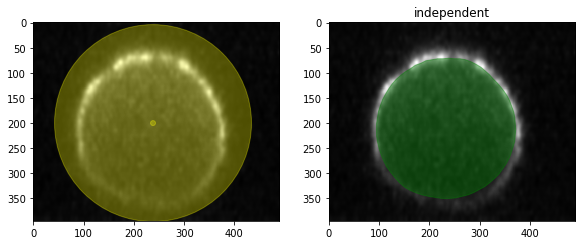

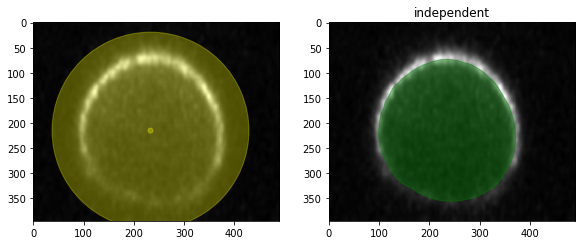

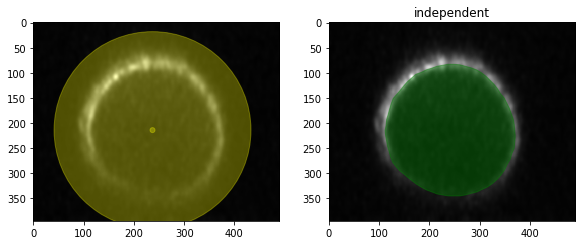

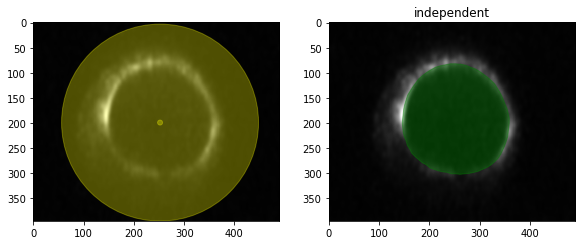

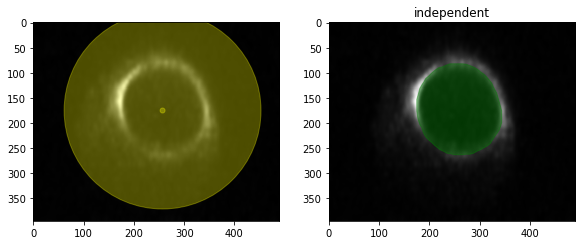

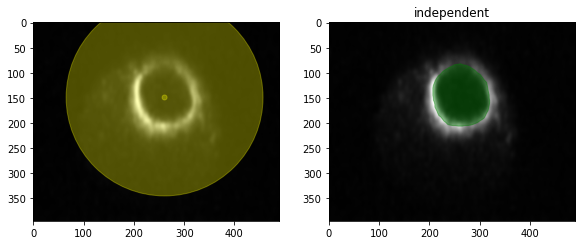

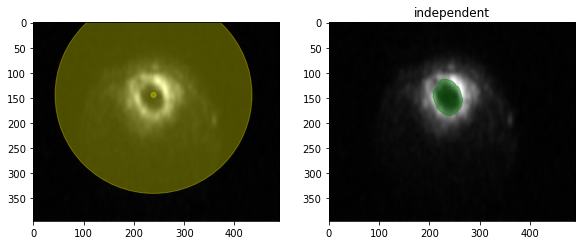

In [9]:
pylab.rcParams['figure.figsize'] = (15, 7)
for frame in range(1,len(data.images),len(data.images)/6):
    fig = plt.figure()
    ax = plt.subplot(131)
    data.plot_minmax( frame, ax )
    ax = plt.subplot(132)
    ax.set_title('independent')
    data.plot_result( frame, ax )
    if ( data.netsurf2dt[0] is not None):
        ax = plt.subplot(133)
        ax.set_title('2dt')
        data.plot_2dt_result( frame, ax )

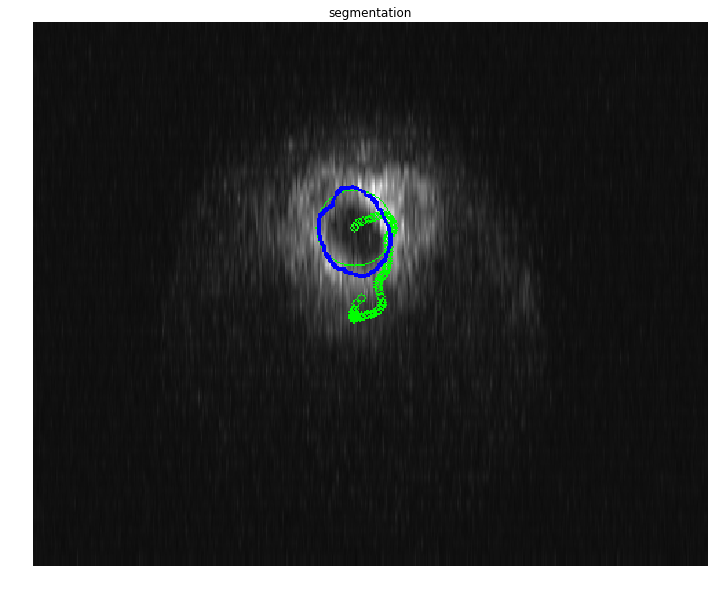

In [10]:
from moviemaker2d import MovieMaker2d
mm = MovieMaker2d(False)
frames, centers, all_polygones, radii = mm.draw_segmentation(data, stack, folder=None, inline=True)

In [11]:
for f in range(len(frames)):
    imsave(folder+'movie_export/frame%02d.tif'%(f), frames[f])

# Measuring intensities

In [12]:
#this defines the width of the ring within to measure

#keyframes = [(0,15),(len(stack)-1,15)]  # example: radius of 15, all the time
#keyframes = [(0,15),(50,20),(60,25),(len(stack)-1,30)]
keyframes = [(0,25),(len(stack)-1,15)]

assert keyframes[0][0]==0
assert len(keyframes)>=2

delta_radius = []
for i in range(len(keyframes)-1):
    key_from = keyframes[i]
    key_to = keyframes[i+1]
    endpoint = (i>=len(keyframes)-2)
    delta_radius.extend(np.linspace(key_from[1],key_to[1],key_to[0]-key_from[0],endpoint=endpoint, dtype=int))
while len(delta_radius)<len(stack):
    delta_radius.extend([delta_radius[-1]])
    

In [13]:
len(delta_radius)

76

In [28]:
help(shape)

Help on function shape in module numpy.core.fromnumeric:

shape(a)
    Return the shape of an array.
    
    Parameters
    ----------
    a : array_like
        Input array.
    
    Returns
    -------
    shape : tuple of ints
        The elements of the shape tuple give the lengths of the
        corresponding array dimensions.
    
    See Also
    --------
    alen
    ndarray.shape : Equivalent array method.
    
    Examples
    --------
    >>> np.shape(np.eye(3))
    (3, 3)
    >>> np.shape([[1, 2]])
    (1, 2)
    >>> np.shape([0])
    (1,)
    >>> np.shape(0)
    ()
    
    >>> a = np.array([(1, 2), (3, 4)], dtype=[('x', 'i4'), ('y', 'i4')])
    >>> np.shape(a)
    (2,)
    >>> a.shape
    (2,)



In [14]:
centers = []
radii = []
masks = []
masked_sum_intensities = []
# masked_sum_intensities_smooth = []

size_x = shape(stack[0])[1]
size_y = shape(stack[0])[0]

for f in range(len(stack)):
    # for each polygone point figure out how it relates to circle position
    center = tuple(data.object_seedpoints[0][f])
    idxes=[]
    for i in range(data.num_columns):
        if data.netsurf2dt[0] is None:
            idx = data.netsurfs[0][f].get_surface_index(i)
        else:
            idx = data.netsurf2dt[0].get_surface_index(f, i)
        idxes.extend([idx])
        # r += idx
    # r /= data.num_columns
    r = median(idxes)
    r /= data.K
    r *= data.object_max_surf_dist[0][f][0] - data.object_min_surf_dist[0][f][0]
    r += data.object_min_surf_dist[0][f][0]

    cx,cy = center
    dr = delta_radius[f]
    r_inner = r-dr
    r_outer = r+dr

    y,x = np.ogrid[-cy:size_y-cy, -cx:size_x-cx]
    mask1 = x*x + y*y <= r_outer*r_outer 
    mask2 = x*x + y*y >= r_inner*r_inner
    mask = mask1 & mask2
    
    masked_sum_intensities.append(np.sum(stack[f]*mask))
#     masked_sum_intensities_smooth.append(np.sum(stack_smooth[f]*mask))
    
    centers.append(center)
    radii.append(r)
    masks.append(mask)

In [15]:
def sector_mask(shape,centre,radius,angle_range):
    """
    Return a boolean mask for a circular sector. The start/stop angles in  
    `angle_range` should be given in clockwise order.
    """

    x,y = np.ogrid[:shape[0],:shape[1]]
    cy,cx = centre
    tmin,tmax = np.deg2rad(angle_range)

    # ensure stop angle > start angle
    if tmax < tmin:
            tmax += 2*np.pi

    # convert cartesian --> polar coordinates
    r2 = (x-cx)*(x-cx) + (y-cy)*(y-cy)
    theta = np.arctan2(x-cx,y-cy) - tmin

    # wrap angles between 0 and 2*pi
    theta %= (2*np.pi)

    # circular mask
    circmask = r2 <= radius*radius

    # angular mask
    anglemask = theta <= (tmax-tmin)

    return circmask*anglemask

In [16]:
from __future__ import print_function

In [21]:
# EXTRACTS DATA PER SEGMENT PER TIMEPOINT (by building segment masks for)

centers = []
radii = []
num_segments = data.num_columns

masks_per_frame = []
masked_sum_int_per_frame = []        # is not a list (time) of lists (segments)
masked_sum_int_smooth_per_frame = [] # is not a list (time) of lists (segments)
masked_pixels_per_frame = []         # is not a list (time) of lists (segments)

size_x = shape(stack[0])[1]
size_y = shape(stack[0])[0]
size_t = len(stack)

for f in range(len(stack)):
    if (f+1) % 10:
        print('.', end='')
    else:
        print('|%.1f%%|'%((f+1)*100.0/len(stack)), end='')
        
    # for each polygone point figure out how it relates to circle position
    center = tuple(data.object_seedpoints[0][f])
    centers.append(center)

    # compute current frame's median radius
    # -------------------------------------
    segment_idxes=[]
    for i in range(num_segments):
        if data.netsurf2dt[0] is None:
            idx = data.netsurfs[0][f].get_surface_index(i)
        else:
            idx = data.netsurf2dt[0].get_surface_index(f, i)
        segment_idxes.extend([idx])
    r = median(segment_idxes)
    r /= data.K
    r *= data.object_max_surf_dist[0][f][0] - data.object_min_surf_dist[0][f][0]
    r += data.object_min_surf_dist[0][f][0]
    radii.append(r)

    # compute masks for current frame
    # -------------------------------
    masks = []                     # is not a list (time) of lists (segments)
    masked_pixels = []
    masked_sum_intensities = []
    masked_sum_intensities_smooth = []
    cx, cy = center
    dr = delta_radius[f]
    r_inner = r-dr
    r_outer = r+dr
    for i in range(num_segments):
        seg_degrees = 360.0/num_segments
        seg_min_deg = i*seg_degrees - seg_degrees/2
        seg_max_deg = i*seg_degrees + seg_degrees/2
        mask1 = sector_mask(stack[f].shape,center,r_outer,(seg_min_deg,seg_max_deg)) #x*x + y*y <= r_outer*r_outer 
        mask2 = sector_mask(stack[f].shape,center,r_inner,(seg_min_deg,seg_max_deg)) #x*x + y*y >= r_inner*r_inner
        mask = mask1 & ~mask2
        
        masked_sum_intensities.append(np.sum(stack[f]*mask))
        masked_sum_intensities_smooth.append(np.sum(stack_smooth[f]*mask))
        
        masked_pixels.append(np.sum(mask))
        masks.append( mask )
        
    masks_per_frame.append(masks)
    masked_pixels_per_frame.append(masked_pixels)
    masked_sum_int_per_frame.append(masked_sum_intensities)
    masked_sum_int_smooth_per_frame.append(masked_sum_intensities_smooth)
print(' done!', end='')

.........|13.2%|.........|26.3%|.........|39.5%|.........|52.6%|.........|65.8%|.........|78.9%|.........|92.1%|......

In [23]:
# DEBUG: show first and last mask, every second segment in it

# masksum = np.zeros_like(masks_per_frame[0][0])
# i=0
# for mask in masks_per_frame[0]:
#     if i % 2:
#         masksum += mask
#     i+=1
# i=1
# for mask in masks_per_frame[-1]:
#     if i % 2:
#         masksum += mask
#     i+=1
# pyplot.imshow(masksum)

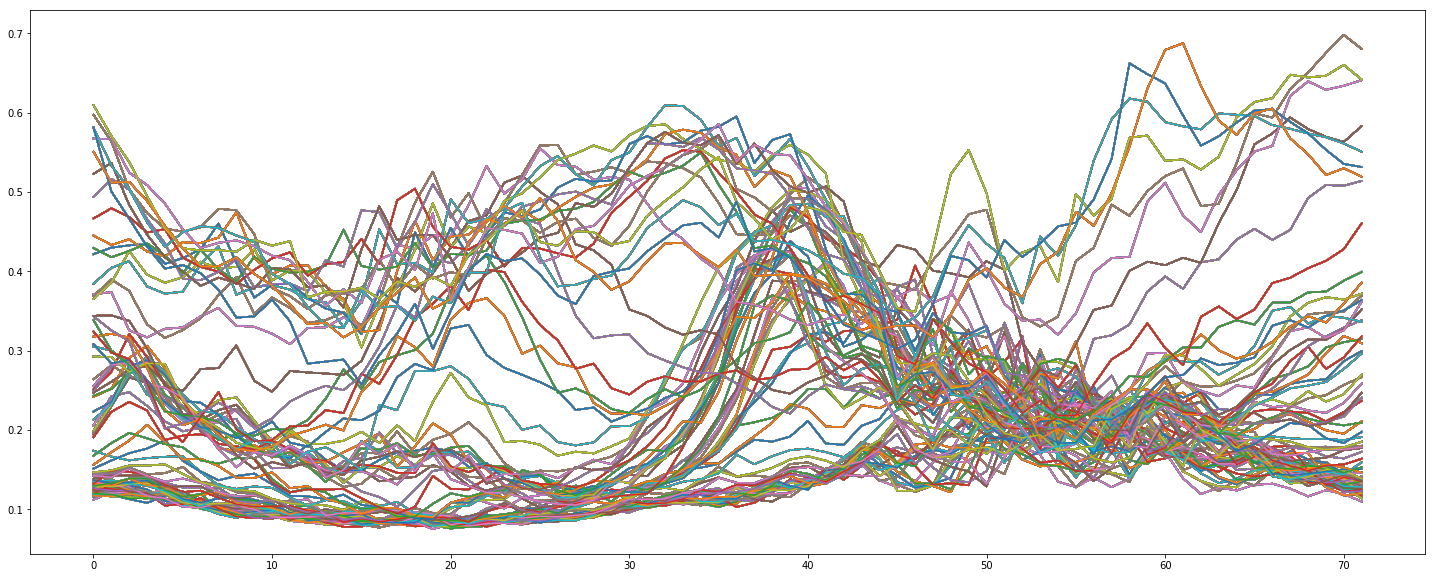

In [25]:
# plot all extracted data
fig = pylab.figure()
transposed_sum = list(zip(*masked_sum_int_per_frame))
transposed_area = list(zip(*masked_pixels_per_frame))
for segment_sequence in transposed_sum:
    pylab.plot(np.divide(transposed_sum,transposed_area))

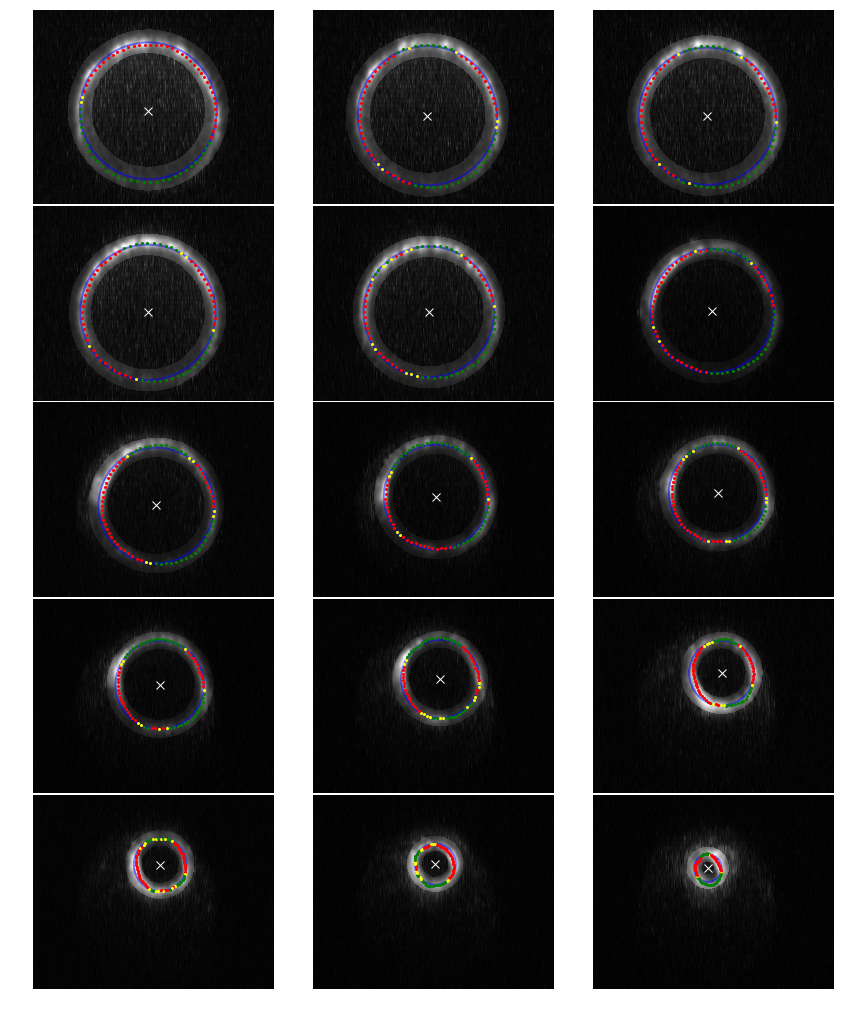

In [26]:
plotsx=3
plotsy=5

figheight=15
fig, axs = pylab.subplots(plotsy, plotsx, figsize=(figheight, int(figheight*(float(size_x)/size_y))))
fig.subplots_adjust(hspace = .01, wspace=.01)
axs = axs.ravel()

for i,f in enumerate(np.linspace(1,len(stack)-1,num=(plotsx*plotsy),dtype=int)):
    ax = axs[i]
    ax.axis('off')
    
    center = centers[f]
    r = radii[f]
    mask = np.zeros_like(masks_per_frame[f][0])
    for segment_mask in masks_per_frame[f]:
        mask += segment_mask 
    
    # PLOTTING BUSINESS

    # get all segmentation polygones for frame f (there is only one, but still)
    polygone = None
    if data.netsurf2dt[0] is None:
        polygone = data.get_result_polygone(0, f)
    else:
        polygone = data.get_result_polygone_2dt(0, f)
    
    # image data mashup
    tmp = np.maximum(stack_smooth[f]*mask, .6*stack[f]*np.logical_not(mask))
    ax.imshow(tmp, plt.get_cmap('gray'))
    
    # center point
    ax.plot([center[0]], [center[1]], marker='x', markersize=8, color="white")
    
    # circle
    circle = pylab.Circle(center, r, color='b', fill=False, lw=2, alpha=0.5)
    ax.add_artist(circle)
    
    # color dots
    for p in polygone:
        d = math.sqrt( (p[0]-center[0])**2 + (p[1]-center[1])**2 )
        if (int(d) > int(r)):
            ax.plot([p[0]], [p[1]], marker='.', markersize=4, color="green")
        else:
            if (int(d) < int(r)):
                ax.plot([p[0]], [p[1]], marker='.', markersize=4, color="red")
            else:
                ax.plot([p[0]], [p[1]], marker='.', markersize=4, color="yellow")
    

Need to do the same as above, but plotting divergence of normalized average radius offset... ;)